In [18]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
df=pd.read_csv("water quality dataset.csv",sep=";")
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [20]:
df.describe()

,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
count,2861.000000,2858.000000,2860.000000,2845.000000,2858.000000,2860.000000,2858.000000,2812.000000,2833.000000,2812.000000
mean,12.397064,0.758734,4.316182,12.931905,9.508902,4.316846,0.246128,59.362313,0.418626,93.731991
std,6.084226,2.486247,2.973997,16.543097,4.428260,6.881188,2.182777,96.582641,0.771326,394.512184
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,8.000000,0.080000,2.160000,6.000000,7.092500,1.390000,0.030000,27.052500,0.130000,26.800000
50%,14.000000,0.220000,3.800000,10.000000,8.995000,2.800000,0.059000,37.800000,0.270000,33.900000
75%,16.000000,0.500000,5.800000,15.000000,11.520000,5.582500,0.125750,64.640000,0.470000,45.607500
max,22.000000,39.427000,50.900000,595.000000,90.000000,133.400000,109.000000,3573.400000,13.879000,5615.280000


In [21]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [22]:
df['NH4']=df['NH4'].fillna(df['NH4'].mean())   
df['BSK5']=df['BSK5'].fillna(df['BSK5'].mean())
df['Suspended']=df['Suspended'].fillna(df['Suspended'].mean())
df['O2']=df['O2'].fillna(df['O2'].mean())
df['NO3']=df['NO3'].fillna(df['NO3'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['SO4']=df['SO4'].fillna(df['SO4'].mean())
df['PO4']=df['PO4'].fillna(df['PO4'].mean())
df['CL']=df['CL'].fillna(df['CL'].mean())
df.isnull().sum()            

id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
dtype: int64

In [23]:
#dd=pd.DataFrame(df['date'])
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
date_column=df['date']
df=df.drop(columns=['date'])
df

,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...
2856,22,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [24]:
sc=MinMaxScaler()
scaled_data=sc.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
final_df = pd.concat([date_column, scaled_df], axis=1)
final_df['year']=final_df['date'].dt.year
final_df['month']=final_df['date'].dt.month
final_df['day']=final_df['date'].dt.day
final_df=final_df.drop(columns=['date'])
final_df

,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month,day
0,0.0,0.008370,0.054420,0.020168,0.136667,0.071214,0.000523,0.043096,0.032711,0.051552,2000,2,17
1,0.0,0.001116,0.058939,0.086723,0.162333,0.133058,0.000312,0.098506,0.006485,0.319127,2000,5,11
2,0.0,0.000812,0.041257,0.041176,0.109667,0.103448,0.001587,0.116416,0.014410,0.446815,2000,9,11
3,0.0,0.004312,0.043811,0.059832,0.137778,0.128411,0.000908,0.077013,0.027163,0.225097,2000,12,13
4,0.0,0.000000,0.059528,0.082017,0.163222,0.074963,0.000596,0.078804,0.009655,0.260358,2001,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,1.0,0.001167,0.052849,0.006050,0.092000,0.028486,0.000349,0.044775,0.052309,0.013860,2020,10,6
2857,1.0,0.000000,0.029862,0.000840,0.125111,0.004198,0.000284,0.041193,0.045681,0.012810,2020,10,27
2858,1.0,0.000862,0.005697,0.001345,0.123222,0.019340,0.000385,0.058745,0.034873,0.010890,2020,12,3
2859,1.0,0.000000,0.041257,0.000000,0.159000,0.029535,0.000312,0.034029,0.030550,0.011303,2021,1,12


In [25]:
final_df.columns

Index(['id', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4',
       'CL', 'year', 'month', 'day'],
      dtype='object')

In [26]:
to_predict=[ 'O2', 'NO3', 'NO2', 'SO4', 'PO4',
       'CL']

In [27]:
X=final_df[['id','year']]
y=final_df[to_predict]

In [28]:
#one hot encoder
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)
#train,test and split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [29]:
# Train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [30]:
y_pred = model.predict(X_test)
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(to_predict):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
O2:
   MSE: 0.0028223334583329473
   R2: 0.00754914708068144

NO3:
   MSE: 0.0009983215429747784
   R2: 0.5194020927821348

NO2:
   MSE: 0.00047913788594371447
   R2: -7.247236776107444

SO4:
   MSE: 0.00021054185384725602
   R2: 0.3196662419997134

PO4:
   MSE: 0.002318880440449385
   R2: 0.35122124498790697

CL:
   MSE: 0.0010939316385289895
   R2: 0.7304769108969779



In [31]:
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(to_predict, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station '22' in 2024:
  O2: 0.11
  NO3: 0.04
  NO2: 0.00
  SO4: 0.09
  PO4: 0.02
  CL: 0.18


In [32]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!


WEEK-3

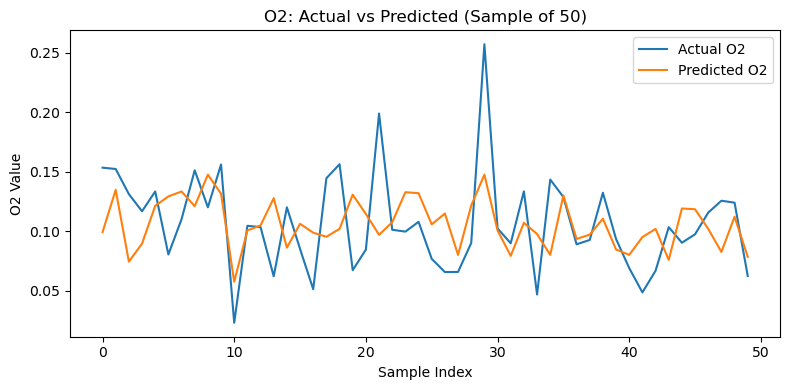

In [35]:
import matplotlib.pyplot as plt

# Example: plot for 'O2'
plt.figure(figsize=(8, 4))
plt.plot(y_test['O2'].values[:50], label='Actual O2')
plt.plot(y_pred[:, to_predict.index('O2')][:50], label='Predicted O2')
plt.title("O2: Actual vs Predicted (Sample of 50)")
plt.xlabel("Sample Index")
plt.ylabel("O2 Value")
plt.legend()
plt.tight_layout()
plt.show()
